# **MVP PUCRIO 2024 - Thales Leal**

---

Clientes Atacadistas (DataSet: https://archive.ics.uci.edu/dataset/292/wholesale+customers)


In [8]:
# - Configuração para não exibir os warnings (alertas que podem aparecer durante a execução)
import warnings  # Importa a biblioteca para manipular warnings
warnings.filterwarnings("ignore")  # Desativa a exibição de warnings

# - Importações necessárias para manipulação de dados e visualização
import pandas as pd  # Importa a biblioteca pandas para trabalhar com dados em formato tabular (DataFrames)
import numpy as np  # Importa a biblioteca numpy para operações numéricas eficientes, especialmente em arrays
import matplotlib.pyplot as plt  # Importa a biblioteca para criação de gráficos (matplotlib)

# - Importações de bibliotecas do scikit-learn para pré-processamento de dados e modelagem
from sklearn.preprocessing import StandardScaler  # Importa o escalador padrão para normalizar os dados (z-score)
from sklearn.preprocessing import MinMaxScaler  # Importa o escalador MinMax para transformar dados para um intervalo [0, 1]

# - Importação de funções para dividir os dados em treino e teste, e para validação cruzada
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import KFold  # Para realizar validação cruzada com a divisão simples dos dados
from sklearn.model_selection import StratifiedKFold  # Para validação cruzada estratificada (preserva a proporção das classes)
from sklearn.model_selection import cross_val_score  # Para calcular a pontuação média de validação cruzada de um modelo
from sklearn.model_selection import GridSearchCV  # Para realizar busca em grade, ajustando parâmetros dos modelos

# - Importação de métricas para avaliar a performance dos modelos
from sklearn.metrics import accuracy_score  # Para calcular a acurácia dos modelos

# - Importação de ferramentas para criação de pipelines (encadeamento de várias etapas de pré-processamento e modelagem)
from sklearn.pipeline import Pipeline  # Para encadear pré-processamento e modelos em um único fluxo

# - Importação dos modelos de machine learning
from sklearn.linear_model import LogisticRegression  # Modelo de regressão logística
from sklearn.tree import DecisionTreeClassifier  # Modelo de árvore de decisão
from sklearn.neighbors import KNeighborsClassifier  # Modelo de K-vizinhos mais próximos
from sklearn.naive_bayes import GaussianNB  # Modelo Naive Bayes (Gaussiano)
from sklearn.svm import SVC  # Modelo de Máquinas de Vetores de Suporte (Support Vector Classifier)

# - Importação de modelos de ensemble (que combinam vários modelos para melhorar o desempenho)
from sklearn.ensemble import BaggingClassifier  # Classificador de Bagging (combinação de modelos em paralelo)
from sklearn.ensemble import RandomForestClassifier  # Floresta aleatória (bagging com árvores de decisão)
from sklearn.ensemble import ExtraTreesClassifier  # Floresta de árvores extra (com mais aleatoriedade que a RandomForest)
from sklearn.ensemble import VotingClassifier  # Classificador de votação (combinando múltiplos modelos)
from sklearn.ensemble import AdaBoostClassifier  # Modelo de AdaBoost (boosting para melhorar a performance)
from sklearn.ensemble import GradientBoostingClassifier  # Modelo de Gradient Boosting (boosting mais avançado)

# - Importação de datasets para uso de exemplos
from sklearn.datasets import load_iris  # Função para carregar o conjunto de dados Iris (usado como exemplo para classificação)

# - Importação do OpenML, uma plataforma para compartilhar e acessar datasets de machine learning
import openml  # Biblioteca para acessar datasets e experimentos do OpenML diretamente


In [29]:
# - Carregando o dataset a partir de um arquivo CSV
dataset = pd.read_csv('/content/Wholesale customers data.csv')

# - Exibindo as primeiras linhas do dataset
print("Primeiras linhas do dataset 'Wholesale Customers':")
print(dataset.head())

# - Verificando os tipos de dados
print("\nTipos de dados das colunas:")
print(dataset.dtypes)

# - Verificando valores nulos
print("\nValores nulos por coluna:")
print(dataset.isnull().sum())

# - Exibindo informações gerais do dataset
print("\nInformações gerais do Dataset:")
print(dataset.info())

# - Supondo que a última coluna seja o alvo (y), e as demais são características (X)
X = dataset.iloc[:, :-1]  # Características (todas as colunas, exceto a última)
y = dataset.iloc[:, -1]   # Alvo (última coluna)

# - Exibindo a descrição do dataset
print("\nDescrição do Dataset:")
print(dataset.describe())

# - Exibindo as primeiras linhas das características
print("\nPrimeiras linhas do Dataset (X):")
print(X.head())


Primeiras linhas do dataset 'Wholesale Customers':
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Tipos de dados das colunas:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Valores nulos por coluna:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Informa

In [32]:
# - Separação dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Utiliza a função train_test_split do scikit-learn para dividir os dados em conjuntos de treino e teste.
# X contém as características (variáveis independentes) e y contém os rótulos (variável dependente).
# test_size=0.3 significa que 30% dos dados serão usados para teste, e os 70% restantes para treino.
# random_state=42 garante que a divisão seja reproduzível (mesma divisão a cada execução do código).

# - Definindo o KFold e a métrica de avaliação
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# StratifiedKFold é usado para dividir os dados em 10 partes (n_splits=10), mantendo a distribuição das classes
# de forma proporcional (estratificada), o que é importante em datasets desbalanceados.
# shuffle=True embaralha os dados antes de dividi-los para evitar qualquer padrão de ordem nos dados.
# random_state=7 é usado para garantir que a divisão seja a mesma a cada execução, permitindo a reprodução dos resultados.

scoring = 'accuracy'
# Define a métrica de avaliação que será usada nas validações cruzadas e em outras avaliações do modelo.
# 'accuracy' é a métrica de acurácia, que calcula a proporção de previsões corretas do modelo.

# - Exibindo o tamanho dos conjuntos de treino e teste
print("Dados de treino:", X_train.shape, y_train.shape)
# Exibe o formato (número de amostras e características) dos dados de treino (X_train e y_train).

print("Dados de teste:", X_test.shape, y_test.shape)
# Exibe o formato (número de amostras e características) dos dados de teste (X_test e y_test).


Dados de treino: (105, 4) (105,)
Dados de teste: (45, 4) (45,)


LR: 0.962727 (0.045717)
KNN: 0.933636 (0.059620)
CART: 0.904545 (0.060610)
NB: 0.923636 (0.055922)
SVM: 0.952727 (0.047378)
Bagging: 0.923636 (0.071605)
RF: 0.923636 (0.071605)
ET: 0.933636 (0.059620)
Ada: 0.905455 (0.072977)
GB: 0.923636 (0.055922)
Voting: 0.952727 (0.047378)


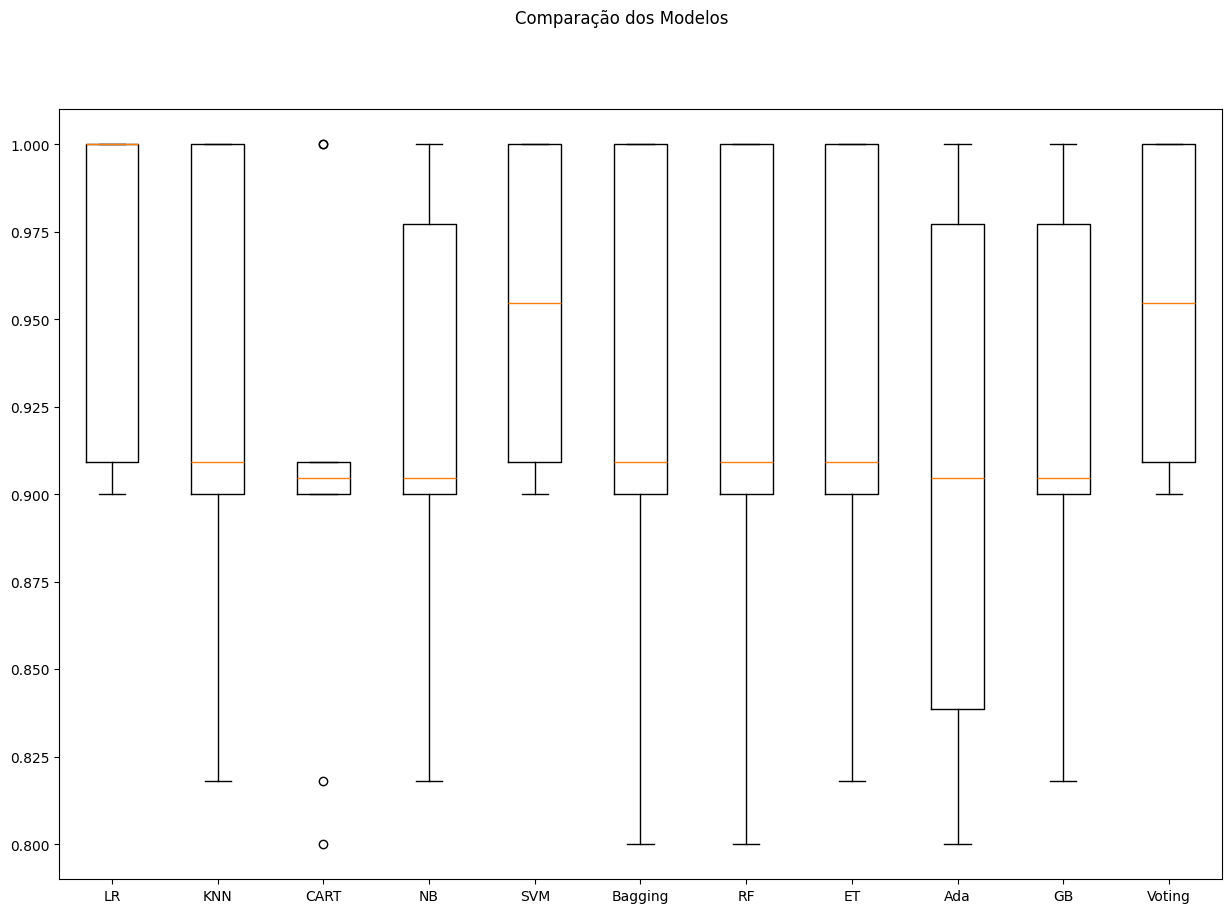

In [34]:
#  - Carregar dados
data = load_iris()
# A função load_iris carrega o conjunto de dados "Iris" do scikit-learn. Ele é um conjunto de dados muito utilizado para testar modelos de aprendizado de máquina.

X = pd.DataFrame(data.data, columns=data.feature_names)
# Cria um DataFrame do pandas a partir dos dados de entrada (data.data), usando os nomes das características (data.feature_names) como cabeçalhos de coluna.

y = pd.Series(data.target)
# Cria uma Série do pandas a partir da variável alvo (data.target), que contém as classes das amostras.

# - Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# A função train_test_split divide os dados em conjuntos de treino e teste.
# test_size=0.3 significa que 30% dos dados vão para o conjunto de teste, e os 70% restantes vão para o conjunto de treino.
# random_state=42 garante que a divisão seja a mesma toda vez que o código for executado, permitindo reprodutibilidade.

# - Garantir que os dados de treino e teste sejam densos
# Caso os dados sejam esparsos, podemos converter com .toarray()
# Aqui vamos assumir que os dados já são densos (no caso do Iris, são densos)

X_train_dense = X_train
# Atribui X_train à variável X_train_dense, garantindo que estamos utilizando dados densos para treino. No caso do Iris, os dados já são densos.

X_test_dense = X_test
# Atribui X_test à variável X_test_dense, garantindo que estamos utilizando dados densos para teste.

scoring = 'accuracy'
# Define a métrica de avaliação que será usada para medir o desempenho do modelo. 'accuracy' indica que a métrica será a acurácia (proporção de previsões corretas).

# - Criando a lista de modelos
models = [
    ('LR', LogisticRegression(max_iter=200)),
    # Adiciona o modelo de regressão logística (LogisticRegression) à lista de modelos. max_iter=200 define o número máximo de iterações para o algoritmo de otimização.

    ('KNN', KNeighborsClassifier()),
    # Adiciona o modelo KNN (KNeighborsClassifier) à lista de modelos. Não há parâmetros adicionais.

    ('CART', DecisionTreeClassifier()),
    # Adiciona o modelo de árvore de decisão (DecisionTreeClassifier) à lista de modelos.

    ('NB', GaussianNB()),
    # Adiciona o modelo Naive Bayes (GaussianNB) à lista de modelos.

    ('SVM', SVC())
    # Adiciona o modelo Support Vector Machine (SVC) à lista de modelos. SVC é o classificador SVM com kernel RBF.
]

# - Adicionando modelos ensemble
base = DecisionTreeClassifier()
# Define a base para os modelos ensemble, que é uma árvore de decisão (DecisionTreeClassifier).

num_trees = 100
# Define o número de árvores que serão usadas nos modelos ensemble.

max_features = 3
# Define o número máximo de características que serão usadas para cada árvore nos modelos ensemble.

models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
# Adiciona o modelo de Bagging (BaggingClassifier) à lista de modelos, usando uma árvore de decisão como base (base) e 100 estimadores (árvores).

models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
# Adiciona o modelo de Random Forest (RandomForestClassifier) à lista de modelos, com 100 estimadores e 3 características máximas para cada árvore.

models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
# Adiciona o modelo de Extra Trees (ExtraTreesClassifier) à lista de modelos, com 100 estimadores e 3 características máximas para cada árvore.

models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
# Adiciona o modelo AdaBoost (AdaBoostClassifier) à lista de modelos, com 100 estimadores.

models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
# Adiciona o modelo Gradient Boosting (GradientBoostingClassifier) à lista de modelos, com 100 estimadores.

# Criando o modelo Voting
bases = []
# Cria uma lista vazia chamada 'bases', que será usada para armazenar modelos para o classificador de votação.

model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
# Adiciona a regressão logística à lista de bases para o modelo de votação.

model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
# Adiciona a árvore de decisão à lista de bases para o modelo de votação.

model3 = SVC()
bases.append(('svm', model3))
# Adiciona o classificador SVM à lista de bases para o modelo de votação.

models.append(('Voting', VotingClassifier(estimators=bases)))
# Adiciona o modelo de Voting (VotingClassifier) à lista de modelos, usando as três bases definidas anteriormente (regressão logística, árvore de decisão e SVM).

# - Configuração de validação cruzada
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
# Define a estratégia de validação cruzada usando KFold, com 10 divisões (n_splits=10).
# random_state=42 garante reprodutibilidade.
# shuffle=True embaralha os dados antes de dividir, evitando qualquer viés causado pela ordem dos dados.

# - Avaliação dos modelos com dados densos
results = []
# Cria uma lista vazia chamada 'results' para armazenar os resultados das avaliações.

names = []
# Cria uma lista vazia chamada 'names' para armazenar os nomes dos modelos.

# - Iterando sobre os modelos para avaliar o desempenho
for name, model in models:
    cv_results = cross_val_score(model, X_train_dense, y_train, cv=kfold, scoring=scoring)
    # Usa a função cross_val_score para avaliar o modelo, com dados de treino e validação cruzada (kfold).
    # O parâmetro 'scoring' define a métrica de avaliação (neste caso, 'accuracy').

    results.append(cv_results)
    # Adiciona os resultados de cada modelo à lista 'results'.

    names.append(name)
    # Adiciona o nome do modelo à lista 'names'.

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    # Cria uma mensagem com o nome do modelo, a média da acurácia e o desvio padrão da acurácia.

    print(msg)
    # Exibe a mensagem contendo o nome do modelo e os resultados da validação cruzada.

#  - Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
# Cria uma nova figura com tamanho de 15x10 polegadas para o gráfico.

fig.suptitle('Comparação dos Modelos')
# Define o título do gráfico como "Comparação dos Modelos".

ax = fig.add_subplot(111)
# Cria um eixo (subplot) para adicionar o gráfico.

plt.boxplot(results)
# Cria um boxplot (gráfico de caixas) usando os resultados dos modelos.

ax.set_xticklabels(names)
# Define os rótulos no eixo x com os nomes dos modelos.

plt.show()
# Exibe o gráfico.

LR-orig: 0.963 (0.046)
LR-padr: 0.935 (0.072)
LR-norm: 0.914 (0.067)
KNN-orig: 0.934 (0.060)
KNN-padr: 0.934 (0.060)
KNN-norm: 0.944 (0.061)
CART-orig: 0.885 (0.072)
CART-padr: 0.895 (0.068)
CART-norm: 0.923 (0.059)
NB-orig: 0.924 (0.056)
NB-padr: 0.924 (0.056)
NB-norm: 0.924 (0.056)
SVM-orig: 0.953 (0.047)
SVM-padr: 0.934 (0.060)
SVM-norm: 0.944 (0.061)
Bagging-orig: 0.924 (0.072)
Bagging-padr: 0.915 (0.067)
Bagging-norm: 0.924 (0.072)
RF-orig: 0.925 (0.056)
RF-padr: 0.915 (0.067)
RF-norm: 0.924 (0.072)
ET-orig: 0.934 (0.060)
ET-padr: 0.934 (0.060)
ET-norm: 0.934 (0.060)
Ada-orig: 0.905 (0.073)
Ada-padr: 0.915 (0.067)
Ada-norm: 0.905 (0.073)
GB-orig: 0.924 (0.056)
GB-padr: 0.915 (0.050)
GB-norm: 0.924 (0.038)
Voting-orig: 0.953 (0.047)
Voting-padr: 0.934 (0.060)
Voting-norm: 0.934 (0.060)


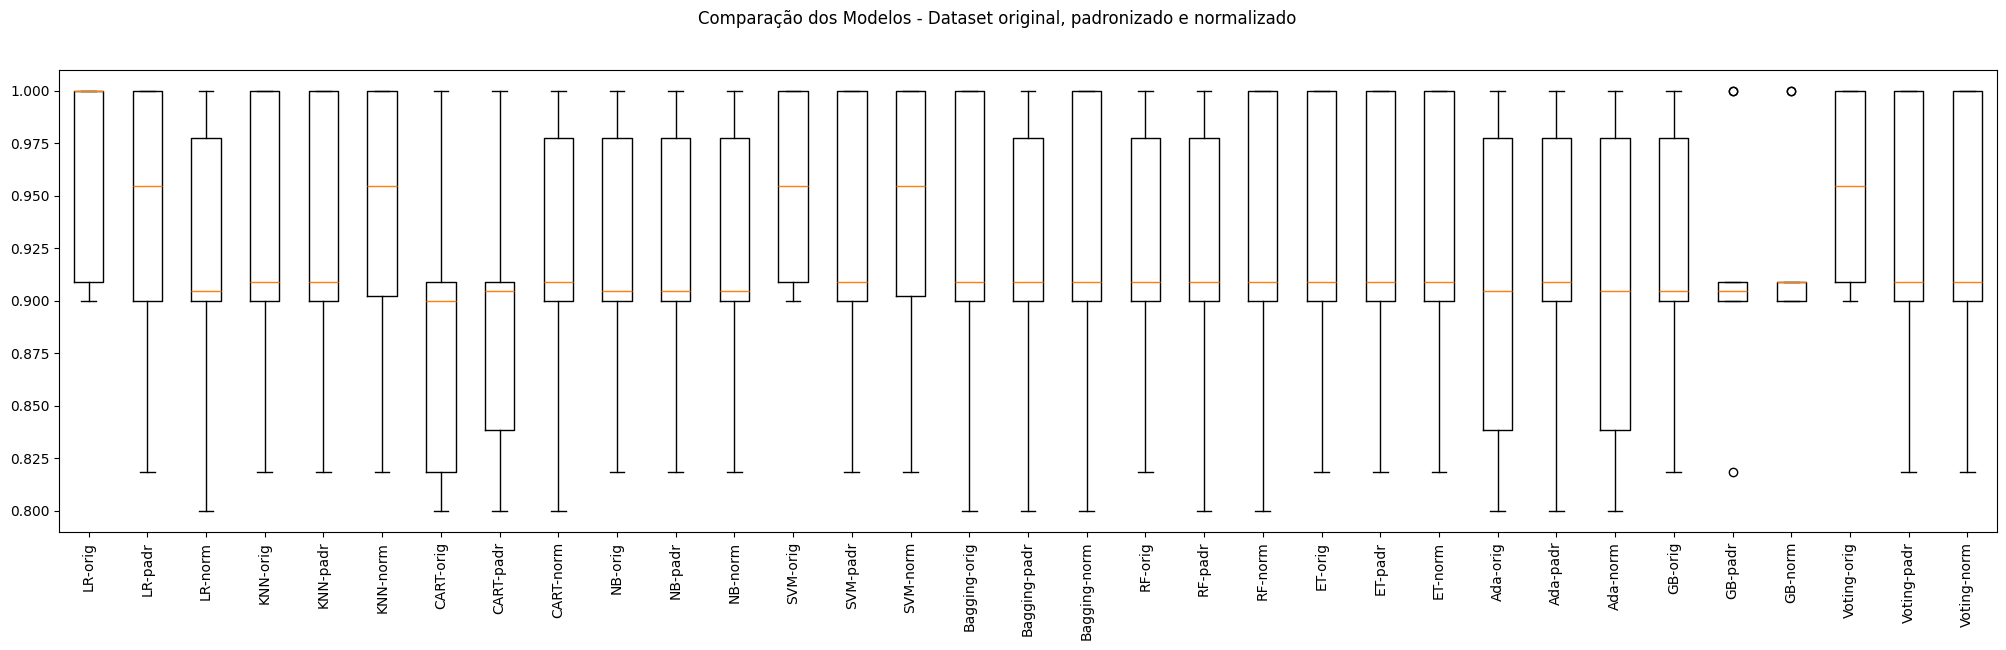

In [35]:
# - Criação e avaliação de modelos: dados padronizados e normalizados
np.random.seed(7)  # Define a semente do gerador de números aleatórios para garantir reprodutibilidade dos resultados.

pipelines = []  # Lista vazia que irá armazenar os pipelines para cada modelo com diferentes transformações.
results = []  # Lista vazia para armazenar os resultados de validação cruzada de cada modelo.
names = []  # Lista vazia para armazenar os nomes dos modelos.

# - Algoritmos
models = [
    ('LR', LogisticRegression(max_iter=200)),  # Regressão logística com 200 iterações de otimização.
    ('KNN', KNeighborsClassifier()),  # K-Nearest Neighbors (KNN), um algoritmo de classificação baseado em vizinhos mais próximos.
    ('CART', DecisionTreeClassifier()),  # Árvore de decisão (CART), um algoritmo que aprende uma estrutura de árvore de decisão.
    ('NB', GaussianNB()),  # Naive Bayes (Gaussian), um classificador probabilístico baseado na distribuição normal dos dados.
    ('SVM', SVC()),  # Support Vector Machine (SVM), um classificador baseado em limites de decisão definidos por vetores de suporte.
    ('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)),  # Bagging, um algoritmo ensemble que combina vários classificadores base (base) com um número de árvores (n_estimators).
    ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)),  # Random Forest, um ensemble de árvores de decisão com árvores adicionais (n_estimators) e limite no número de características (max_features) por árvore.
    ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)),  # Extra Trees, um modelo ensemble semelhante ao Random Forest, mas com maior aleatoriedade.
    ('Ada', AdaBoostClassifier(n_estimators=num_trees)),  # AdaBoost, um algoritmo de boosting que combina classificadores fracos em um classificador forte.
    ('GB', GradientBoostingClassifier(n_estimators=num_trees)),  # Gradient Boosting, um algoritmo de boosting que ajusta os classificadores sequencialmente para corrigir erros dos anteriores.
    ('Voting', VotingClassifier(bases))  # Voting, um classificador que faz a combinação de múltiplos modelos (modelos base) por votação.
]

# - Transformações que serão utilizadas
standard_scaler = StandardScaler()  # Criação de um transformador de padronização (zero média, unidade de variância).
min_max_scaler = MinMaxScaler()  # Criação de um transformador de normalização (transforma os dados para o intervalo [0, 1]).

# - Montando os pipelines corretamente
for model_name, model in models:
    # Cria e adiciona os pipelines à lista de pipelines.
    pipelines.append((f'{model_name}-orig', Pipeline([('model', model)])))  # Pipeline com o modelo original, sem transformação.
    pipelines.append((f'{model_name}-padr', Pipeline([('scaler', standard_scaler), ('model', model)])))  # Pipeline com o modelo e transformação de padronização.
    pipelines.append((f'{model_name}-norm', Pipeline([('scaler', min_max_scaler), ('model', model)])))  # Pipeline com o modelo e transformação de normalização.

# - Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_dense, y_train, cv=kfold, scoring=scoring)  # Executa a validação cruzada para cada pipeline.
    results.append(cv_results)  # Armazena os resultados da validação cruzada para o modelo atual.
    names.append(name)  # Armazena o nome do pipeline atual (modelo + transformação).
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())  # Gera uma mensagem com a média e o desvio padrão dos resultados da validação cruzada.
    print(msg)  # Exibe a mensagem com os resultados do modelo.

# - Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))  # Cria uma figura com um tamanho de 25x6 polegadas para o gráfico.
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')  # Define o título do gráfico.
ax = fig.add_subplot(111)  # Cria um eixo para o gráfico.
plt.boxplot(results)  # Cria um boxplot (gráfico de caixa) com os resultados da validação cruzada de todos os modelos.
ax.set_xticklabels(names, rotation=90)  # Define os rótulos do eixo X com os nomes dos modelos e rota os rótulos para 90 graus.
plt.show()  # Exibe o gráfico.


In [36]:
# - Otimização dos hiperparâmetros

# - Definindo a semente para reprodutibilidade dos resultados
np.random.seed(7)  # Configura a semente para o gerador de números aleatórios, garantindo que os resultados possam ser reproduzidos.

pipelines = []  # Lista onde os pipelines dos modelos serão armazenados.

#  - Definindo os componentes do pipeline
knn = KNeighborsClassifier()  # Cria uma instância do classificador K-Nearest Neighbors (KNN).
standard_scaler = StandardScaler()  # Cria uma instância do transformador de padronização (StandardScaler).
min_max_scaler = MinMaxScaler()  # Cria uma instância do transformador de normalização (MinMaxScaler).

# - Adicionando diferentes versões do pipeline para o KNN
pipelines.append(('knn-orig', Pipeline(steps=[('model', knn)])))  # Pipeline com KNN sem qualquer transformação (modelo original).
pipelines.append(('knn-padr', Pipeline(steps=[('scaler', standard_scaler), ('model', knn)])))  # Pipeline com KNN e transformação de padronização (StandardScaler).
pipelines.append(('knn-norm', Pipeline(steps=[('scaler', min_max_scaler), ('model', knn)])))  # Pipeline com KNN e transformação de normalização (MinMaxScaler).

# - Definindo a grade de parâmetros (param_grid) para o GridSearchCV
param_grid = {
    'model__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Lista de valores possíveis para o número de vizinhos no KNN.
    'model__metric': ["euclidean", "manhattan", "minkowski"],  # Lista de métricas de distância possíveis para o KNN.
}

# - Prepara e executa o GridSearchCV
for name, model in pipelines:  # Itera sobre cada pipeline criado para o modelo KNN.
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)  # Configura o GridSearchCV com o modelo, a grade de parâmetros, a métrica de avaliação e a validação cruzada.
    grid.fit(X_train_dense, y_train)  # Treina o GridSearchCV nos dados de treinamento, buscando os melhores hiperparâmetros.
    # Exibe o melhor modelo encontrado para o pipeline atual, incluindo o melhor score e os parâmetros usados.
    print("Melhor modelo para %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Melhor modelo para knn-orig - Melhor: 0.943636 usando {'model__metric': 'euclidean', 'model__n_neighbors': 15}
Melhor modelo para knn-padr - Melhor: 0.934545 usando {'model__metric': 'euclidean', 'model__n_neighbors': 3}
Melhor modelo para knn-norm - Melhor: 0.952727 usando {'model__metric': 'manhattan', 'model__n_neighbors': 13}


In [37]:
# - Finalização do Modelo

# - Avaliação do modelo com o conjunto de testes

# - Preparação do modelo
scaler = StandardScaler().fit(X_train_dense)  # Cria uma instância do StandardScaler e ajusta nos dados de treinamento (calculando média e desvio padrão).
rescaledX = scaler.transform(X_train_dense)  # Transforma os dados de treinamento com o scaler (padronizando os dados: subtraindo a média e dividindo pelo desvio padrão).
model = LogisticRegression(max_iter=200)  # Cria uma instância do modelo de regressão logística com 200 iterações máximas.
model.fit(rescaledX, y_train)  # Treina o modelo de regressão logística usando os dados de treinamento transformados (padronizados) e os rótulos (y_train).

# - Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test_dense)  # Transforma os dados de teste com o mesmo scaler usado nos dados de treinamento (aplica as mesmas transformações de padronização).
predictions = model.predict(rescaledTestX)  # Faz previsões com o modelo treinado usando os dados de teste transformados.
print(f"Acurácia do modelo: {accuracy_score(y_test, predictions):.4f}")  # Calcula e imprime a acurácia do modelo, comparando as previsões com os rótulos reais (y_test).

# - Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)  # Cria uma nova instância do StandardScaler e ajusta nos dados completos (X).
rescaledX = scaler.transform(X)  # Aplica a transformação de padronização aos dados completos (X), agora usando o scaler ajustado nos dados inteiros.
model.fit(rescaledX, y)  # Treina o modelo com todos os dados disponíveis (X e y) após a transformação.


Acurácia do modelo: 1.0000


LogisticRegression(max_iter=200)

In [38]:
# - Suponha que X_train_dense seja o conjunto de treinamento utilizado
scaler = StandardScaler()  # Cria uma instância do StandardScaler, que será usada para padronizar os dados.

scaler.fit(X_train_dense)  # Ajusta o scaler nos dados de treinamento. Isso calcula a média e o desvio padrão de X_train_dense.

# - Agora você pode transformar os dados de entrada (novos dados) da mesma forma:
entrada = pd.DataFrame({
    'Fresh': [12000, 30000, 8000],  # Coluna 'Fresh' com dados fictícios para três entradas.
    'Milk': [5000, 5000, 4000],     # Coluna 'Milk' com dados fictícios.
    'Grocery': [5000, 5000, 3000],  # Coluna 'Grocery' com dados fictícios.
    'Delicassen': [2000, 2000, 1000] # Coluna 'Delicassen' com dados fictícios.
})  # Cria um DataFrame com novos dados de entrada, que representam características (variáveis) do modelo treinado.

# - Garantindo que as colunas da entrada estejam na mesma ordem do modelo treinado
entrada = entrada[['Fresh', 'Milk', 'Grocery', 'Delicassen']]  # Reordena as colunas do DataFrame para garantir que estejam na mesma ordem do modelo treinado.

# - Convertendo o DataFrame de entrada para um array NumPy
array_entrada = entrada.values  # Converte o DataFrame 'entrada' para um array NumPy para facilitar a manipulação de dados numéricos.

X_entrada = array_entrada[:, 0:4].astype(float)  # Seleciona todas as linhas e as primeiras 4 colunas do array, convertendo para tipo float (garantindo que os dados sejam numéricos).

# - Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)  # Aplica a transformação (padronização) aos dados de entrada usando o scaler ajustado previamente com X_train_dense.

print(rescaledEntradaX)  # Imprime o array com os dados de entrada já padronizados (os dados de entrada têm agora média 0 e desvio padrão 1).



[[14462.52866909 11985.77362662  2916.36098376  2704.042054  ]
 [36166.88962944 11985.77362662  2916.36098376  2704.042054  ]
 [ 9639.33734457  9587.17517347  1748.91287424  1351.18289854]]


In [28]:
# - Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)  # Usa o modelo treinado para prever as classes (rótulos) dos dados de entrada padronizados (rescaledEntradaX).

print(saidas)  # Exibe as predições feitas pelo modelo, ou seja, as classes previstas para os dados de entrada.


[2 2 2]
